# Clustering with Record Data

## Introduction
I plan to use the record (fertility rate) data for the clustering section, which can be found [here](https://github.com/anly501/anly-501-project-yeyaxin1103/blob/main/data/01-modified-data/FertilityRate_Clean.csv). The fertility rate dataset contains 10 columns and 5735 rows, however, not all features will be used for the clustering task, which will be shown in the feature selection part. More deatiled information can be found in the fertility rate dataset introduction part.

The goal of this section is to use various clustering methods such as **KMean**, **DBSCAN**, and **hierarchical clsutering** to group the fertility rate data with no pre-defined labels provided. In this case, if the clustering process results in new labels, then it suggests that there might exist unknown or undiscovered groups based on the features of data provided. Discovering potential unkown clusters can be very helpful for further data exploration and utilization. It is also helpful for identifying underlying patterns and revealing internel structure of the data.

## Fertility Dataset Import, Cleaning, and Exploration
This part will provide a snapshot as well as the basic information of the fertility rate dataset. 

#### Import Libraries and Load Dataset

In [5]:
# import relevant packages
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

Here is the snapshot of the fertility rate dataset that will be used for clustering analysis:

In [6]:
#import dataset
df = pd.read_csv("../../data/01-modified-data/FertilityRate_Clean.csv")
df.head()

Country_Name Country_Code  year  FertilityRate      Region IncomeGroup  \
0  Afghanistan          AFG  1990          7.466  South Asia  Low income   
1  Afghanistan          AFG  1991          7.479  South Asia  Low income   
2  Afghanistan          AFG  1992          7.502  South Asia  Low income   
3  Afghanistan          AFG  1993          7.535  South Asia  Low income   
4  Afghanistan          AFG  1994          7.572  South Asia  Low income   

   GDPperCapita_USD  Human_Dev_Index  Tertiary_school_Enroll_Pctg  \
0        287.200843         0.426556                     2.211410   
1        287.200843         0.426556                     2.780193   
2        287.200843         0.426556                     2.780193   
3        287.200843         0.426556                     2.780193   
4        287.200843         0.426556                     2.780193   

               label  
0  Above Replacement  
1  Above Replacement  
2  Above Replacement  
3  Above Replacement  
4  Above Replacement

#### Explore Dataset
Below is the basic information of the fertility dataset, it has 5735 rows and 10 features:

In [7]:
print("The shape of this dataframe is:", df.shape, '\n')
df.info()

The shape of this dataframe is: (5735, 10) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country_Name                 5735 non-null   object 
 1   Country_Code                 5735 non-null   object 
 2   year                         5735 non-null   int64  
 3   FertilityRate                5735 non-null   float64
 4   Region                       5735 non-null   object 
 5   IncomeGroup                  5735 non-null   object 
 6   GDPperCapita_USD             5735 non-null   float64
 7   Human_Dev_Index              5735 non-null   float64
 8   Tertiary_school_Enroll_Pctg  5735 non-null   float64
 9   label                        5735 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 448.2+ KB


#### Feature Selection and Missing Values Checking
As mentioned in the introduction part, not all features will be or should be used for the clustering analysis. For example, columns like *Country_Name* and *Country_Code* probably would not add much value to the clustering process because they count as labels. The *label* column will also be excluded due to the reason that it contains the label generated based on the fertility rate of a country/region. Therefore, the updated dataset with features needed looks like this:

In [8]:
DF = df.drop(['Country_Name', 'Country_Code', 'label'], axis=1)
DF.head()

year  FertilityRate      Region IncomeGroup  GDPperCapita_USD  \
0  1990          7.466  South Asia  Low income        287.200843   
1  1991          7.479  South Asia  Low income        287.200843   
2  1992          7.502  South Asia  Low income        287.200843   
3  1993          7.535  South Asia  Low income        287.200843   
4  1994          7.572  South Asia  Low income        287.200843   

   Human_Dev_Index  Tertiary_school_Enroll_Pctg  
0         0.426556                     2.211410  
1         0.426556                     2.780193  
2         0.426556                     2.780193  
3         0.426556                     2.780193  
4         0.426556                     2.780193

In [9]:
DF.isna().sum()

year                           0
FertilityRate                  0
Region                         0
IncomeGroup                    0
GDPperCapita_USD               0
Human_Dev_Index                0
Tertiary_school_Enroll_Pctg    0
dtype: int64

Based on the results above, we can see there are no missing values in this dataset.

#### Clusters Visualizations based on Categorical Data Features
Get various y labels

In [38]:
print('--------------- Unique Region Values ---------------\n', DF['Region'].unique())
print('\n--------------- Unique Income Group Values ---------------\n', DF['IncomeGroup'].unique())

--------------- Unique Region Values ---------------
 ['South Asia' 'Sub-Saharan Africa' 'Europe & Central Asia'
 'Middle East & North Africa' 'Latin America & Caribbean'
 'East Asia & Pacific' 'North America']

--------------- Unique Income Group Values ---------------
 ['Low income' 'Lower middle income' 'Upper middle income' 'High income'
 'Unclassified']


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'South Asia'),
  Text(1, 0, 'Sub-Saharan Africa'),
  Text(2, 0, 'Europe & Central Asia'),
  Text(3, 0, 'Middle East & North Africa'),
  Text(4, 0, 'Latin America & Caribbean'),
  Text(5, 0, 'East Asia & Pacific'),
  Text(6, 0, 'North America')])

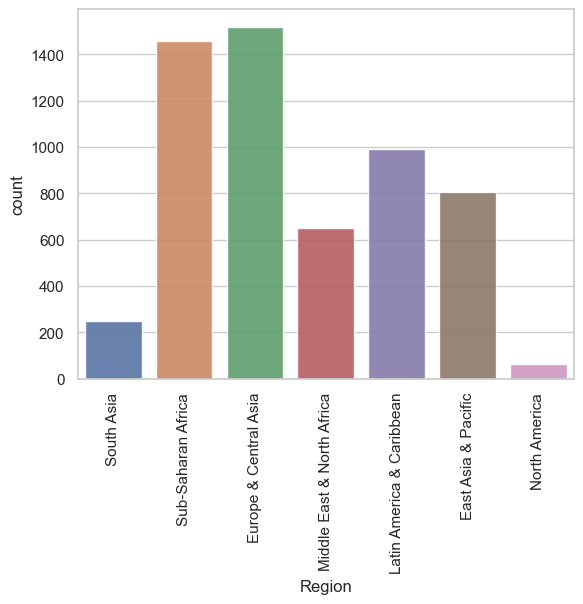

In [10]:
# plot number of records by regions
sns.set_theme(style="whitegrid")
sns.countplot(x = df['Region'], alpha = 0.9)
plt.xticks(rotation='vertical')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Low income'),
  Text(1, 0, 'Lower middle income'),
  Text(2, 0, 'Upper middle income'),
  Text(3, 0, 'High income'),
  Text(4, 0, 'Unclassified')])

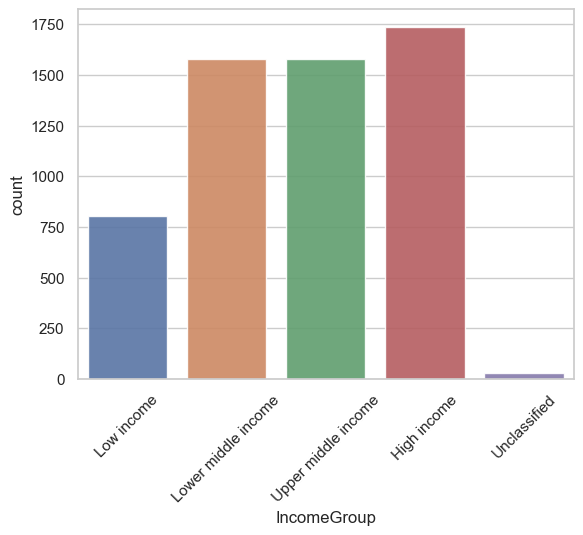

In [11]:
# plot number of records by Income Groups
sns.set_theme(style="whitegrid")
sns.countplot(x = df['IncomeGroup'], alpha = 0.9)
plt.xticks(rotation=45)

Text(0.5, 1.0, 'GDP per Capita (USD) vs. Fertility Rate by Region')

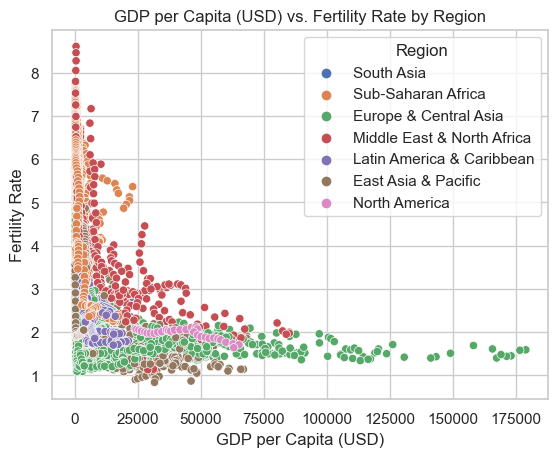

In [12]:
sns.scatterplot(data=DF, x="GDPperCapita_USD", y="FertilityRate", hue="Region")
plt.xlabel("GDP per Capita (USD)")
plt.ylabel("Fertility Rate")
plt.title("GDP per Capita (USD) vs. Fertility Rate by Region")

Text(0.5, 1.0, 'Human Development Index vs. Fertility Rate by Region')

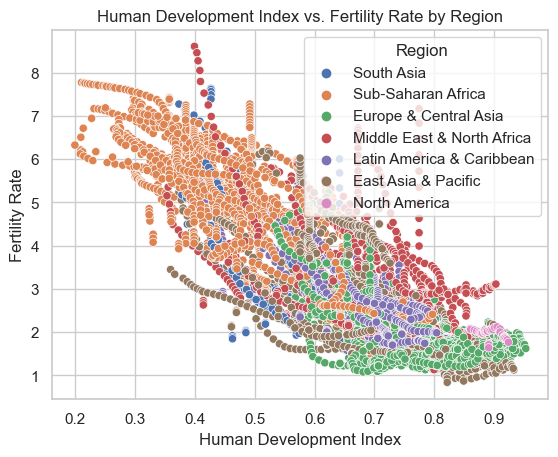

In [13]:
sns.scatterplot(data=DF, x="Human_Dev_Index", y="FertilityRate", hue="Region")
plt.xlabel("Human Development Index")
plt.ylabel("Fertility Rate")
plt.title("Human Development Index vs. Fertility Rate by Region")

Text(0.5, 1.0, 'Tertiary School Enrollment Percentage vs. Fertility Rate by Region')

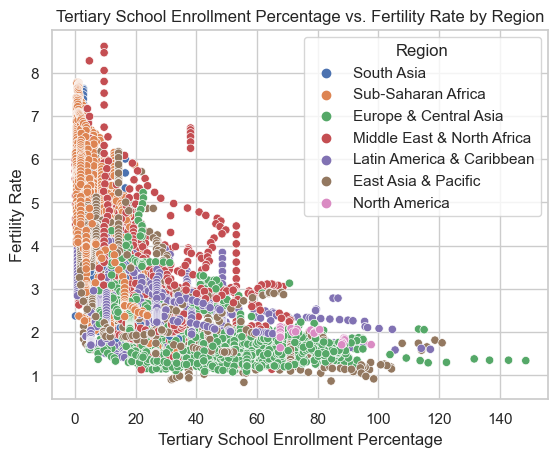

In [14]:
sns.scatterplot(data=DF, x="Tertiary_school_Enroll_Pctg", y="FertilityRate", hue="Region")
plt.xlabel("Tertiary School Enrollment Percentage")
plt.ylabel("Fertility Rate")
plt.title("Tertiary School Enrollment Percentage vs. Fertility Rate by Region")

Text(0.5, 1.0, 'GDP per Capita (USD) vs. Fertility Rate by Income Group')

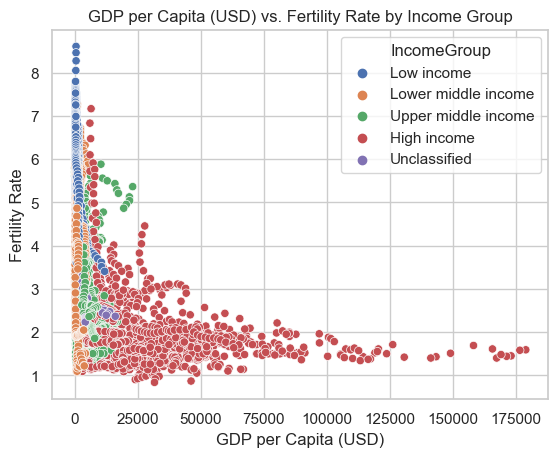

In [15]:
sns.scatterplot(data=DF, x="GDPperCapita_USD", y="FertilityRate", hue="IncomeGroup")
plt.xlabel("GDP per Capita (USD)")
plt.ylabel("Fertility Rate")
plt.title("GDP per Capita (USD) vs. Fertility Rate by Income Group")

Text(0.5, 1.0, 'Human Development Index vs. Fertility Rate by Region')

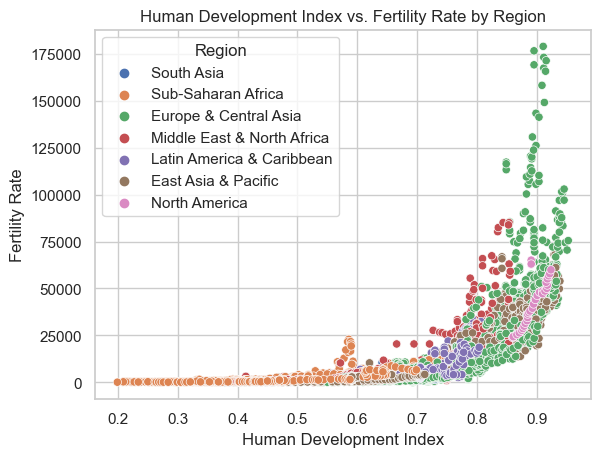

In [16]:
sns.scatterplot(data=DF, x="Human_Dev_Index", y="GDPperCapita_USD", hue="Region")
plt.xlabel("Human Development Index")
plt.ylabel("Fertility Rate")
plt.title("Human Development Index vs. Fertility Rate by Region")

Above are some of the possible clusterings that can be generated by the data offered, we can see that these groups are intertwined and do not have a regular shape or area. Therefore, different kinds of clustering methods should be applied to the data in order to attain more accurate groups.

## Seperate Dataset into Features and Labels
Split the dataset as X and y, y will not be used for clustering since it is unsupervised learning. Then normalize X: using standard score *(x - mu)/sigma* on numeric variables, and replace categorical values with category codes by using the cat.codes function.


In [17]:

X = DF
y = df[['label']]

X['Region'] = X['Region'].astype('category').cat.codes
X['IncomeGroup'] = X['IncomeGroup'].astype('category').cat.codes

#X['FertilityRate'] = (X['FertilityRate'] - X['FertilityRate'].mean()) / X['FertilityRate'].std()
#X['GDPperCapita_USD'] = (X['GDPperCapita_USD'] - X['GDPperCapita_USD'].mean()) / X['GDPperCapita_USD'].std()
# X['Human_Dev_Index'] = (X['Human_Dev_Index'] - X['Human_Dev_Index'].mean()) / X['Human_Dev_Index'].std()
#X['Tertiary_school_Enroll_Pctg'] = (X['Tertiary_school_Enroll_Pctg'] - X['Tertiary_school_Enroll_Pctg'].mean()) / X['Tertiary_school_Enroll_Pctg'].std()

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(X)
X = scalar.transform(X)


## **Clustering Methods**

### **What is K-means Clustering?**
K-means clustering is one of the commonly and frequently used clustering methods. By randomly initializing the number of k centroids (k can be a self-defined number, a centroid is the center point of a cluster), it keeps assigning data points to the nearest centroids and re-assigning centroids through numerous iterations until there is nothing can be changed further. The final groups will be the ones after the iterations. 

Here is the visualization of how K-means clustering works ([Source](https://www.learnbymarketing.com/methods/k-means-clustering/)):


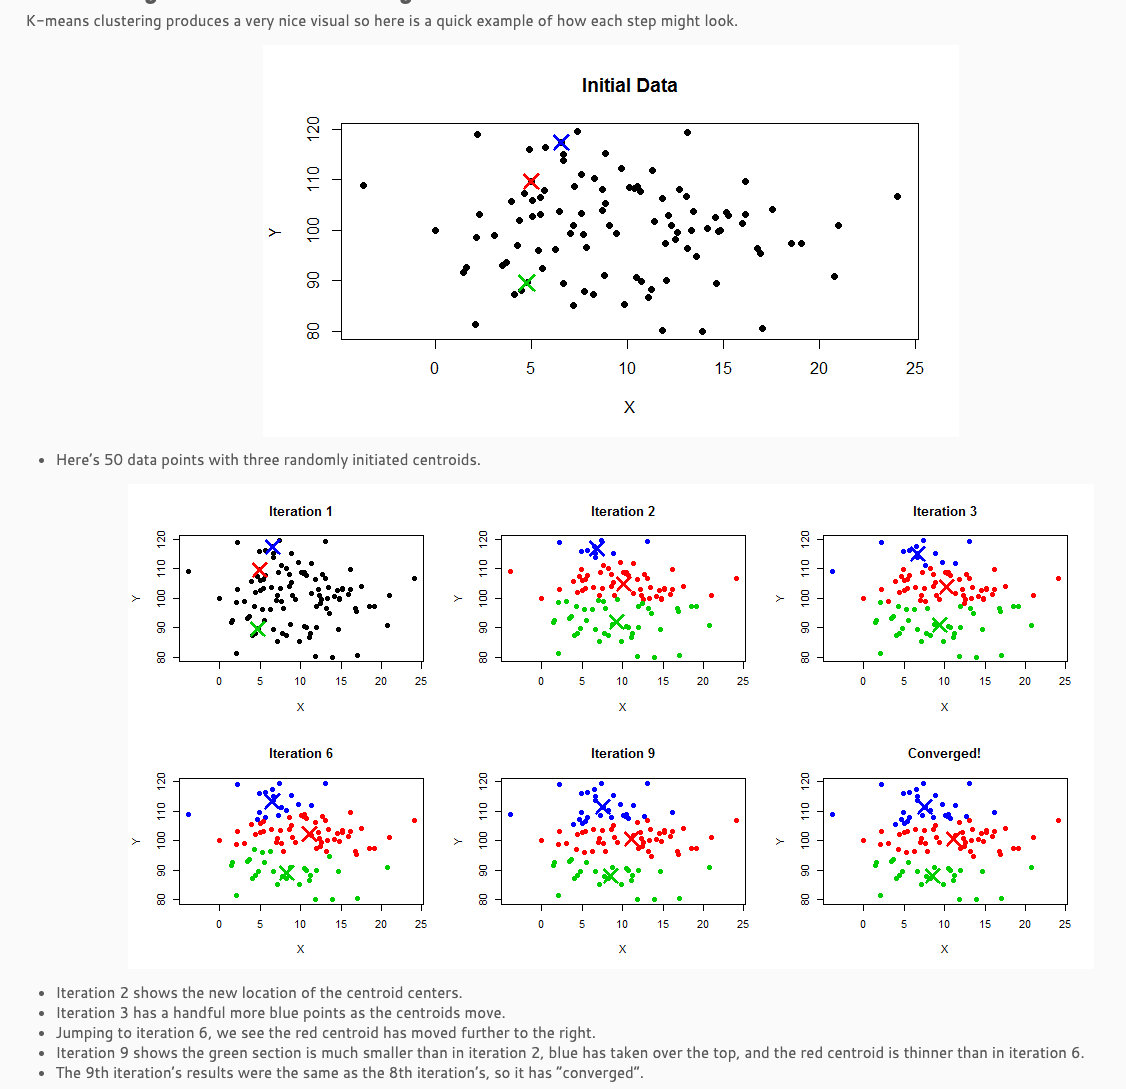

In [18]:
from IPython.display import Image
Image(filename='kmeans.png')

#### **Perform K-means on Fertility Rate Data**

In [19]:
# import relevent libraries for clustering. we will use KMeans, AgglomerativeClustering, MeanShift, Birch, and DBSCAN
from statistics import mode
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift, Birch, DBSCAN 
from scipy.spatial.distance import cdist
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

For K-means clustering I will use the elbow method to find the optimal number of clusters. The elbow method is a hyper-parameter tuning method that is very easy to understasnd and implement: using the turning point, also known as the 'elbow' of a line chart to help us identify the most optimal K (the number of clusters) for clustering a dataset since the ideal model is the one with low inertia and a low number of K.

I will use the inertia_ attribute to find the sum of squared distances of samples to their closest cluster center. I will use the range of 1 to 10 clusters, and plot the inertia_ values for each number of clusters. 

In [20]:
distortions = []
inertias = []
k = 11

for k in range(1, k):
    kmeanModel = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeanModel.fit(X)
    
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
    evaluation = pd.DataFrame.from_records({'Cluster':np.arange(1, k+1), 'Distortion':distortions, 'Inertia':inertias})
    
    
evaluation

Cluster  Distortion       Inertia
0        1    2.510992  40145.000000
1        2    2.009034  26149.671429
2        3    1.659346  18351.026057
3        4    1.545402  15871.472113
4        5    1.433925  13716.470853
5        6    1.340790  12219.332245
6        7    1.305025  11058.091019
7        8    1.254608  10240.145741
8        9    1.204383   9515.812120
9       10    1.165283   8870.208760

array([<AxesSubplot:xlabel='Cluster'>, <AxesSubplot:xlabel='Cluster'>],
      dtype=object)

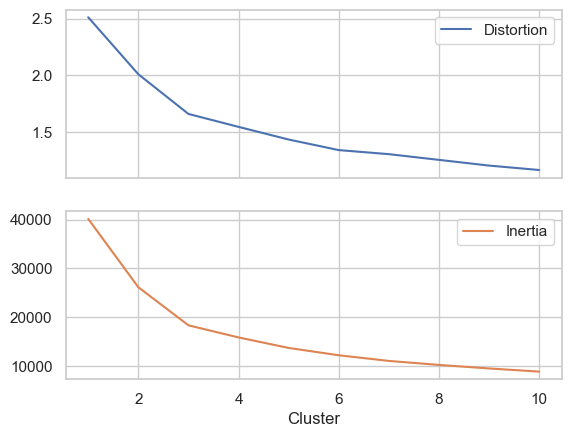

In [21]:
evaluation.plot.line(x = 'Cluster', subplots=True)

Based on the plots above, we can see that the 'elbow' of the line charts is at 3. Therefore, it is safe to assume an optimal K (number of clusters) for the fertility rate dataset would be 3. 

#### Compare Original Clusters with K-means Clusters
In this part, we will plot the data points using the original labels defined based on the fertility rate, as well as the data points using the labels from K-means clustering method.

<AxesSubplot:xlabel='GDPperCapita_USD', ylabel='FertilityRate'>

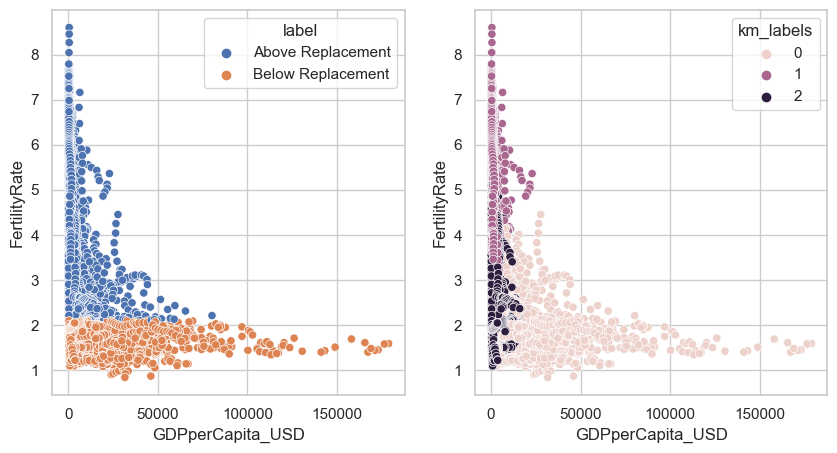

In [23]:
bestK = KMeans(n_clusters=3, init='k-means++', random_state= 42)
km_labels = bestK.fit_predict(X)
df['km_labels'] = km_labels
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.scatterplot(data=df, x="GDPperCapita_USD", y="FertilityRate", hue="label", ax=ax[0])
sns.scatterplot(data=df, x="GDPperCapita_USD", y="FertilityRate", hue="km_labels", ax=ax[1])

<AxesSubplot:xlabel='Human_Dev_Index', ylabel='FertilityRate'>

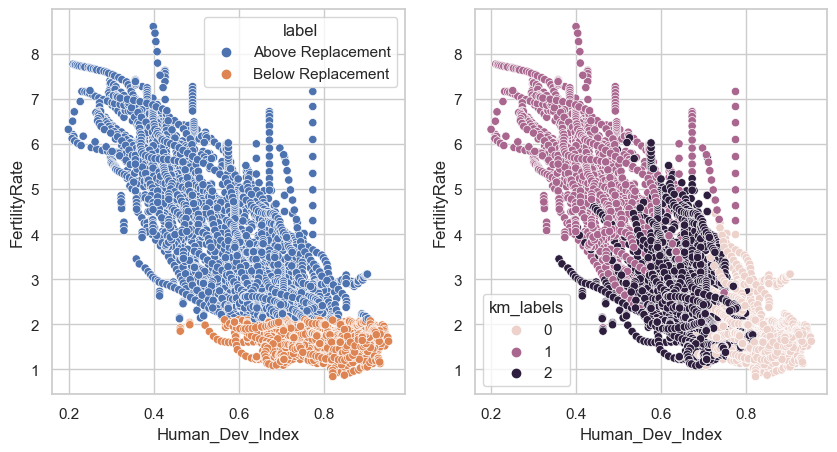

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.scatterplot(data=df, x="Human_Dev_Index", y="FertilityRate", hue="label", ax=ax[0])
sns.scatterplot(data=df, x="Human_Dev_Index", y="FertilityRate", hue="km_labels", ax=ax[1])

From the plots above, we can see that there might exist different kinds of clusters other than the original two groups made based on the fertility rate (above replacement & below replacement). To confirm this, more clustering methods will be applied to the fertility rate dataset.

### **What is DBSCAN?**
DBSCAN, short for density-based spatial clustering of applications with noise, is a clustering method that groups data points based on their density. This method works by seperating the data points into low-density space and high-density space based on the number and distance of their nearby neighbor data points. DBSCAN works well with data that is not linearly seperable or has irregular shapes of clusters. 

Here is the visualization of how DBSCAN method works and the difference between DBSCAN and other clustering methods ([Source](https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/)):

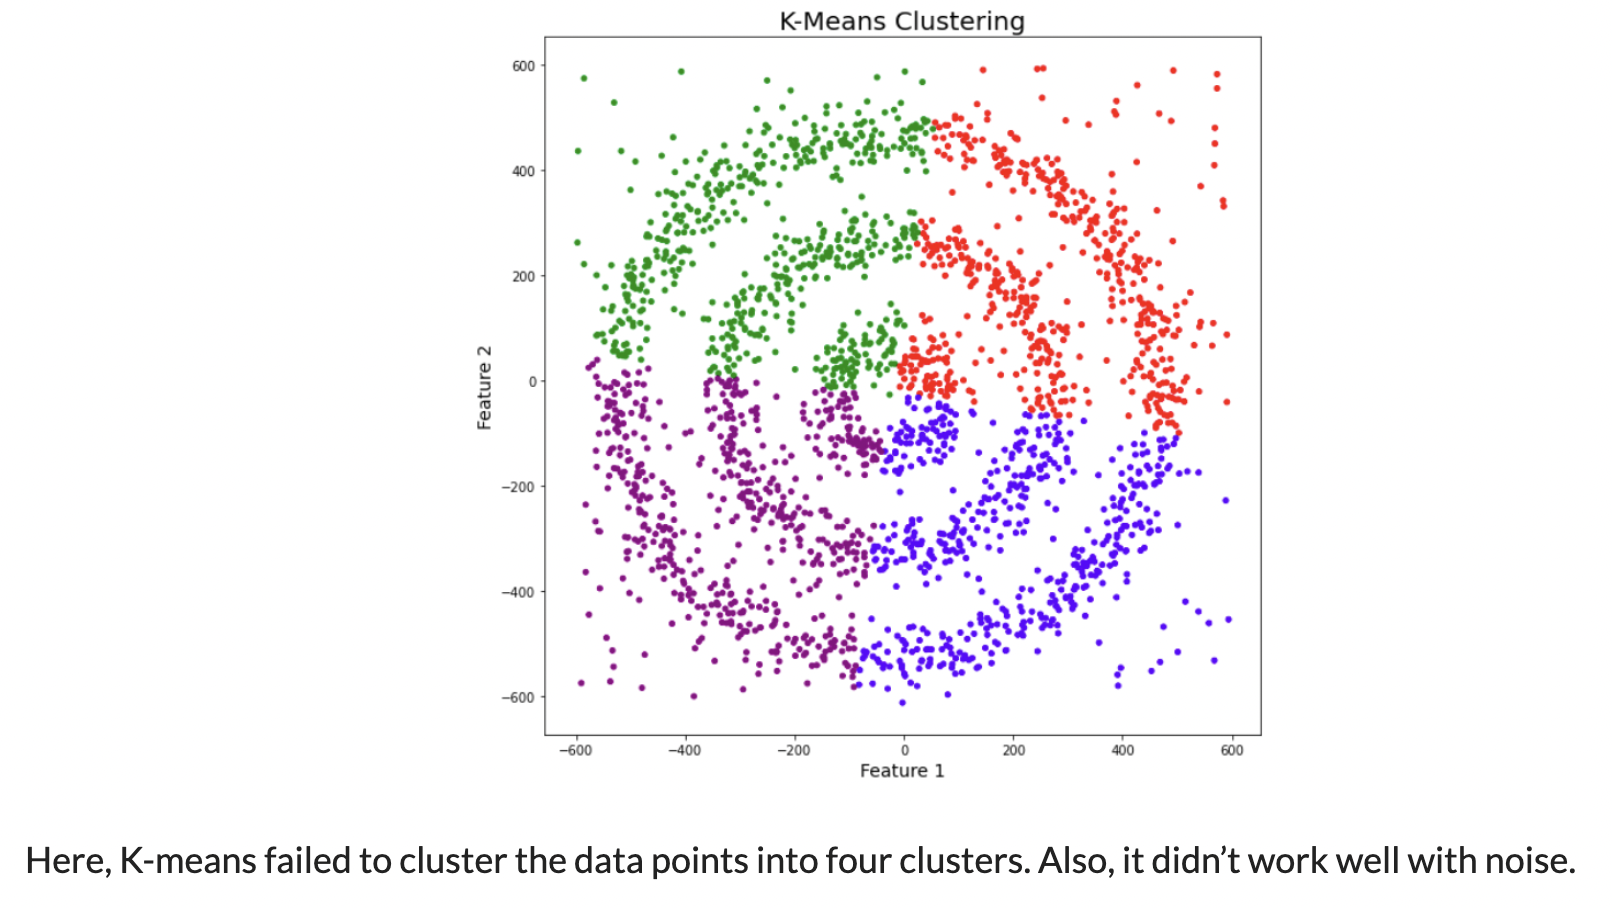

In [25]:
Image(filename='km02.png')


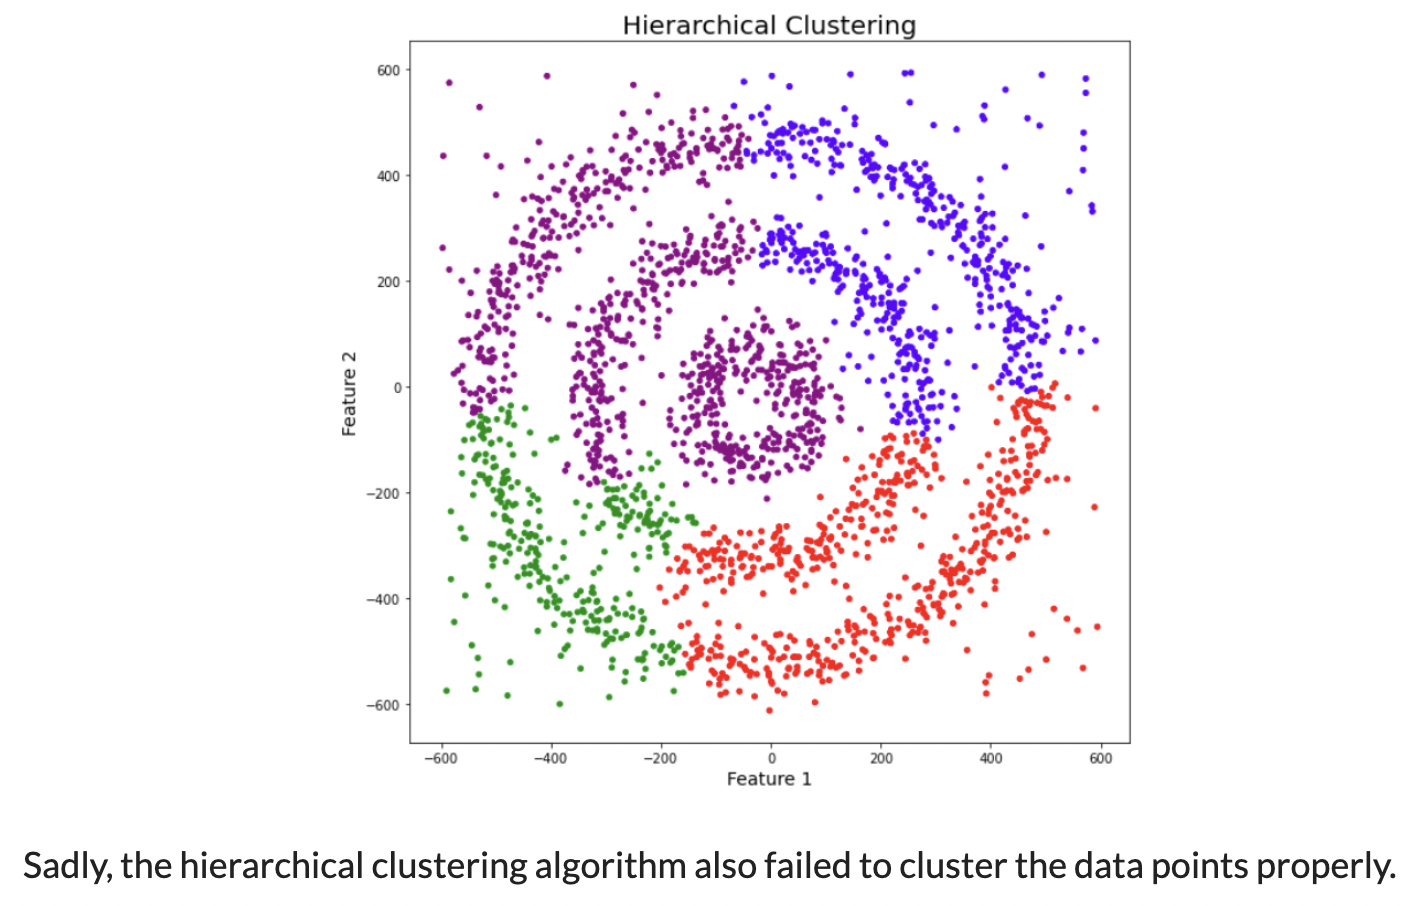

In [60]:
Image(filename='hc01.png')

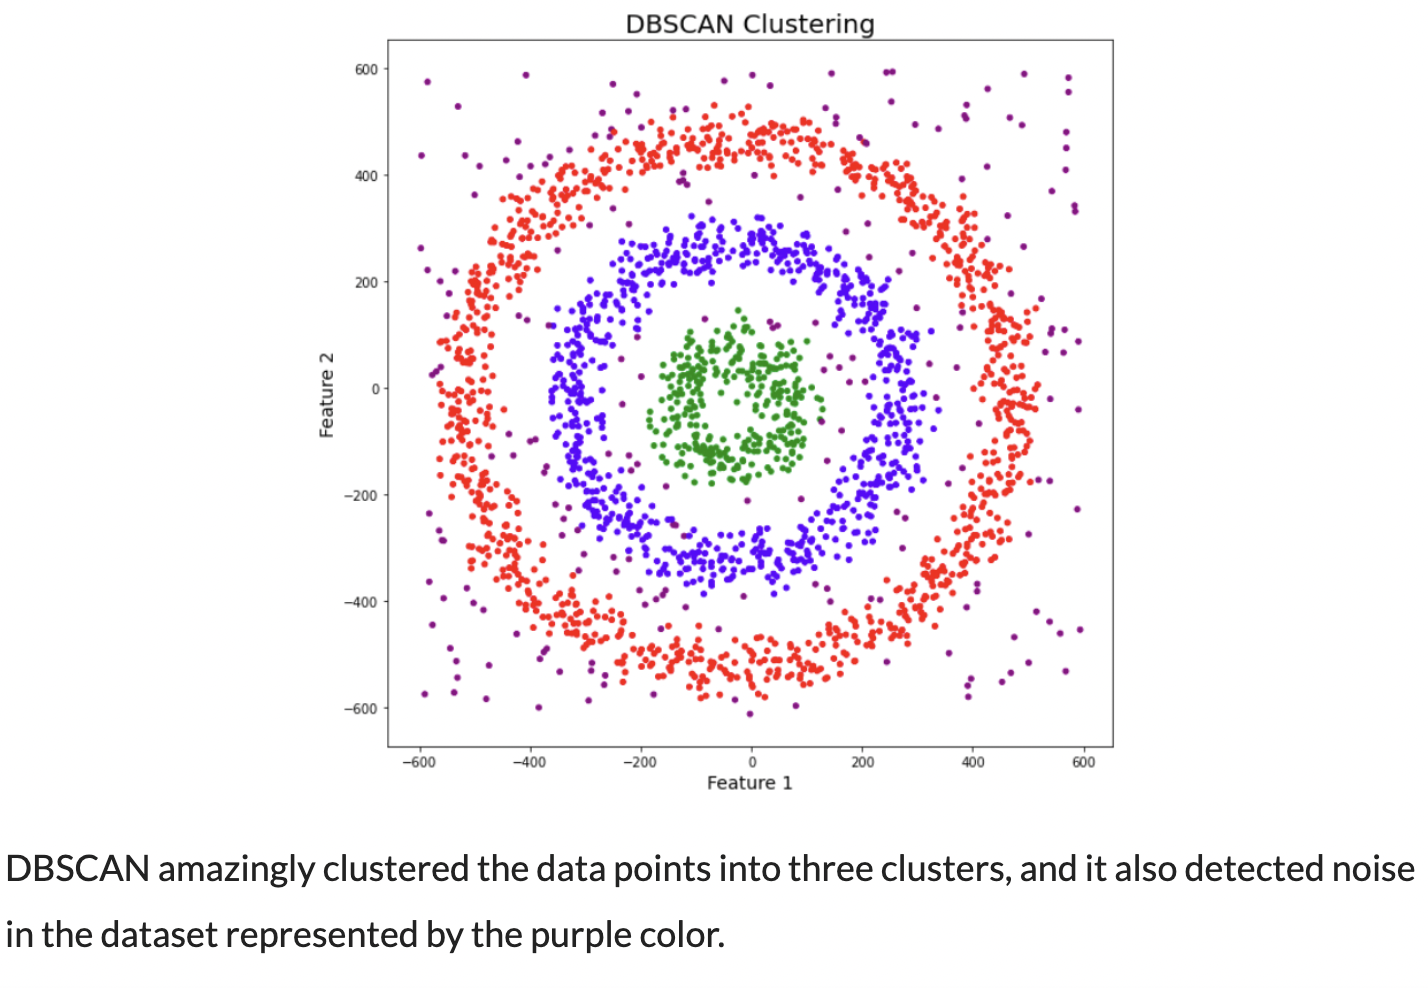

In [26]:
Image(filename='db.png')

#### **Perform DBSCAN and Predict Labels**
In this part, I will apply the DBSCAN method to dataset X and predict the labels for the clusters.

The functions below will iterate over one hyper-parameter (grid search) and return the cluster result that optimizes the Silhouette score, which illustrates the distance between the points in different clusters. The result of this will determine the value for the eps parameter in DBSCAN function:

In [27]:
import sklearn.cluster

# THIS WILL ITERATE OVER ONE HYPER-PARAMETER (GRID SEARCH) 
# AND RETURN THE CLUSTER RESULT THAT OPTIMIZES THE SILHOUETTE SCORE
def maximize_silhouette(X,algo="birch",nmax=20,i_plot=False):

    # PARAM
    i_print=False

    #FORCE CONTIGUOUS
    X=np.ascontiguousarray(X) 

    # LOOP OVER HYPER-PARAM
    params=[]; sil_scores=[]
    sil_max=-10
    for param in range(2,nmax+1):
        if(algo=="birch"):
            model = sklearn.cluster.Birch(n_clusters=param).fit(X)
            labels=model.predict(X)

        if(algo=="ag"):
            model = sklearn.cluster.AgglomerativeClustering(n_clusters=param).fit(X)
            labels=model.labels_

        if(algo=="dbscan"):
            param=0.5*(param-1)
            model = sklearn.cluster.DBSCAN(eps=param).fit(X)
            labels=model.labels_

        if(algo=="kmeans"):
            model = sklearn.cluster.KMeans(n_clusters=param).fit(X)
            labels=model.predict(X)

        try:
            sil_scores.append(sklearn.metrics.silhouette_score(X,labels))
            params.append(param)
        except:
            continue 

        if(i_print): print(param,sil_scores[-1])
        
        if(sil_scores[-1]>sil_max):
             opt_param=param
             sil_max=sil_scores[-1]
             opt_labels=labels

    print("OPTIMAL PARAMETER =",opt_param)

    if(i_plot):
        fig, ax = plt.subplots()
        ax.plot(params, sil_scores, "-o")  
        ax.set(xlabel='Hyper-parameter', ylabel='Silhouette')
        plt.show()

    return opt_labels


# UTILITY PLOTTING FUNCTION
def plot(X,color_vector):
    fig, ax = plt.subplots()
    ax.scatter(X[:,0], X[:,1],c=color_vector, cmap="viridis") #, alpha=0.5) #, c=y
    ax.set(xlabel='Feature-1 (x_1)', ylabel='Feature-2 (x_2)',
    title='Cluster data')
    ax.grid()
    # fig.savefig("test.png")
    plt.show()

OPTIMAL PARAMETER = 1.0


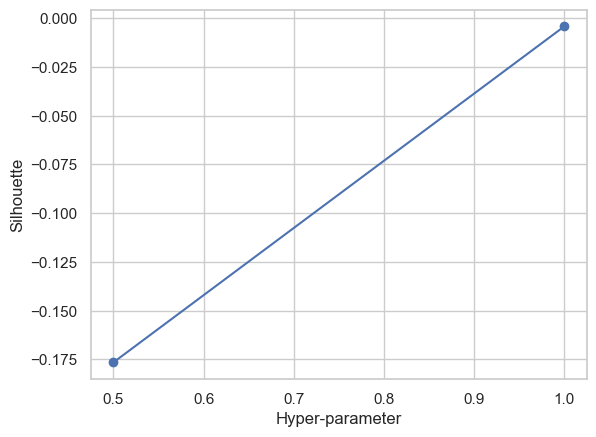

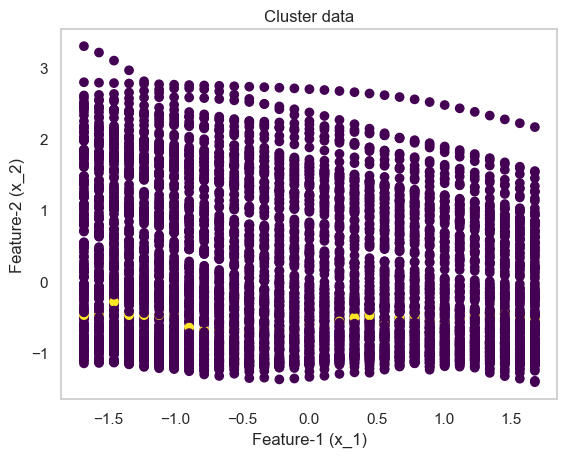

In [28]:
# DBSCAN
opt_labels=maximize_silhouette(X,algo="dbscan",nmax=15, i_plot=True)
plot(X,opt_labels)

Based on the Silhouette score generate above, we can see that the optimal value for the eps parameter would be 1.

<AxesSubplot:xlabel='GDPperCapita_USD', ylabel='FertilityRate'>

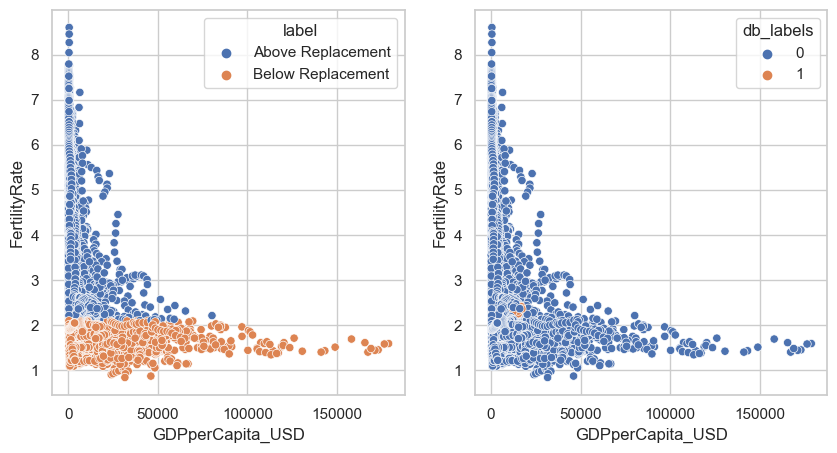

In [29]:
model = DBSCAN(eps=1, min_samples=3).fit(X)
labels_DBSCAN = model.labels_

df['db_labels'] = labels_DBSCAN
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.scatterplot(data=df, x="GDPperCapita_USD", y="FertilityRate", hue="label", ax=ax[0])
sns.scatterplot(data=df, x="GDPperCapita_USD", y="FertilityRate", hue="db_labels", ax=ax[1])

<AxesSubplot:xlabel='Human_Dev_Index', ylabel='FertilityRate'>

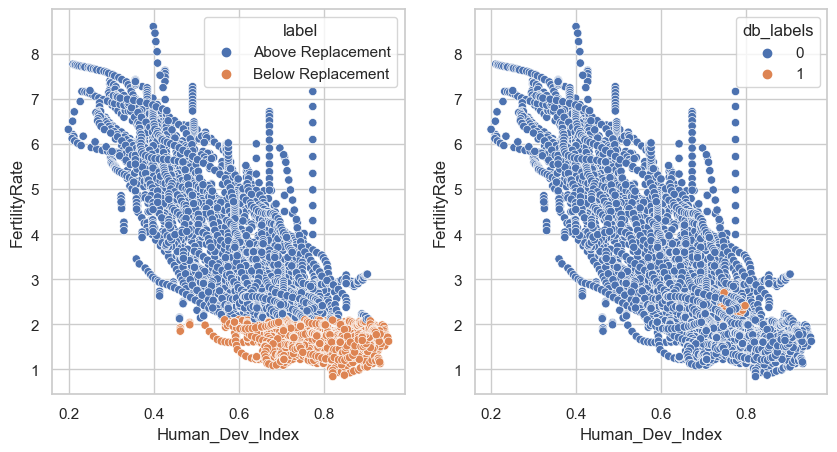

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.scatterplot(data=df, x="Human_Dev_Index", y="FertilityRate", hue="label", ax=ax[0])
sns.scatterplot(data=df, x="Human_Dev_Index", y="FertilityRate", hue="db_labels", ax=ax[1])

Based on the plots above, we can see that although DBSCAN also divide the data points into two groups, the size of one group is substanstially larger than the other group. In other words, the clusterings seem to be heavily imbalanced in size, which contributes very limited value for distinguishing any potential underlying patterns in the data. Therefore, DBSCAN might not be the optimal clustering method for the fertility rate dataset.

### **What is Hierarchical Clustering?**
Unlike partitional clustering such as k means clustering divides data points into seperate and non-repeating groups, clusterings created by hierarchical clustering methods can be nested and overlapped. In other words, there exists hierarchies in the groups. Therefore, there does not exist a fixed number of k that defines the number of clusterings. 

There are normally two kinds of hierarchical clustering strategies:
- **Agglomerative (bottom-up)**: This approach starts from little clusters and then merges with the others to form bigger clusters.
- **Divisive (top-down)**: This approach starts from the biggest cluster in which all data points are included, and then splits the data points into smaller, nested clusters.

The clusters formed using hierarchical clustering methods are usually displayed by dendrograms. An example of drogram will be shown below ([Source](https://www.javatpoint.com/hierarchical-clustering-in-machine-learning)):


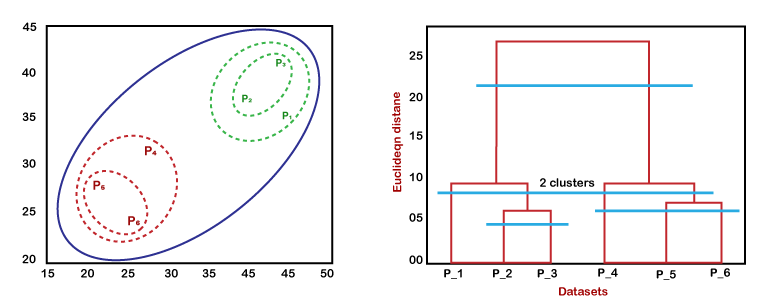

In [31]:
Image(filename='dendro.png')

#### **Perform Hierarchical Clustering on Fertility Rate Dataset**
For the hierarchical clustering part, I choose to perform agglomerative clustering approach on the fertility rate dataset, which means the clustering process will be implemented in a bottom-up manner.

In [32]:
# Perform Agglomerative Clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering().fit(X)
labels_agg = model.labels_

#### Plot the Clusters for Agglomerative Clustering

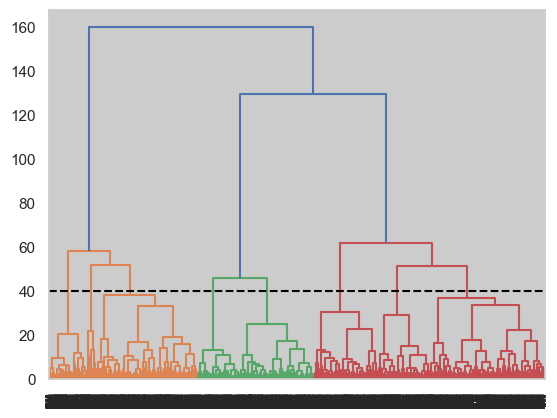

In [35]:
# create linkage for agglomerative clustering, and the dendrogram for the linkage. 
# Suggest the optimal number of clusters based on the dendrogram.
Z = linkage(X, method='ward')
dend = dendrogram(Z)
plt.axhline(y=40, color='black', linestyle='--', label='21')

Based on the dendrogram above, it is safe to assume that the optimal number of the clusters could be 2 or 3. From the dendrogram we can see that there exists 3 main sub-clusters, which can be distinguished by the orange, green, and red parts in the plot. However, the data points in the fertility dataset can also be divide into 2 groups based on the blue lines in the dendrogram. This result also aligns with the results from the other two clustering methods performed previously. 

## **Conclusion**
Based on the outcomes of all three clustering methods (KMeans, DBSCAN, Hierarchical) used in the previous parts, KMeans Clustering and Agglomerative Clustering work better than DBSCAN. However, all the clustering methods provide insightful results. For example, the result of KMeans clustering suggested it is possible that different kinds of labels exist. In other words, there exists other criteria to group the data points other than the existing one, which is the label (*Below Replacement* or *Above Replacement*) created based on the fertility rate of a country/region. In such cases, often times different or more features are being used for the clustering process. 
